In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
def ler_csv(file, separador, encode, zebrado=False):
    return pd.read_csv(file, sep=separador, encoding=encode, squeeze = zebrado)

In [4]:
def regiao_codigo(df):    
    return df

In [5]:
df_ESC = ler_csv("./base/ESCOLAS.csv", '|', 'iso-8859-1', True)
df_TS_ESC = ler_csv("./base/TS_ESCOLA.csv", ',', 'iso-8859-1', True)
df_Est_Reg_Cap = ler_csv("base/EsatosNomeUFRegiao.csv", ',', 'utf-8', True)

/usr/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [5]:
# df_ESC.head(5)

In [6]:
# df_TS_ESC.head(5)

In [6]:
E = df_ESC.groupby(['IN_AGUA_INEXISTENTE', 'CO_REGIAO', 'CO_UF']).size().reset_index(name='TOTAL_CONTAGEM')

df5 = pd.merge(E, df_Est_Reg_Cap, on='CO_UF')
df5['PERCENT'] = ((df5['TOTAL_CONTAGEM']/df5['TOTAL_CONTAGEM'].sum())*100)
df5 = df5[df5['IN_AGUA_INEXISTENTE']==1.0]
gk = df_ESC.groupby('TP_DEPENDENCIA')

In [8]:
# gk['TP_DEPENDENCIA'].count()

In [9]:
#gk['TP_DEPENDENCIA'].plot.hist( edgecolor='black',title="Dependencias das escolas em valores")

# E.tail(5).plot.bar(x='CO_REGIAO' , y='TOTAL_CONTAGEM',figsize=(8, 5),color="green",title="Escolas por Regian que nao possui agua")
# (E.tail(5)).plot.bar(x='CO_REGIAO' , y='TOTAL_CONTAGEM',title="Escolas por Regian que nao possui agua")

# df_2 = marcas_conta['PERCENT'] = ((marcas_conta['TP_DEPENDENCIA']/marcas_conta['TP_DEPENDENCIA'].sum())*100)

[Text(0, 0, 'Federal'),
 Text(0, 0, 'Estadual'),
 Text(0, 0, 'Municipal'),
 Text(0, 0, 'Privada')]

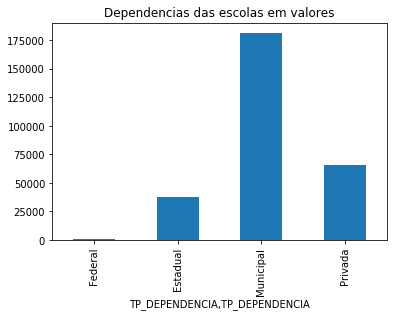

In [7]:
fig, ax = plt.subplots()
gk['TP_DEPENDENCIA'].value_counts().plot.bar(title="Dependencias das escolas em valores")
ax.set_xticklabels(['Federal','Estadual', 'Municipal','Privada'])

[Text(0, 0, 'Federal'),
 Text(0, 0, 'Estadual'),
 Text(0, 0, 'Municipal'),
 Text(0, 0, 'Privada')]

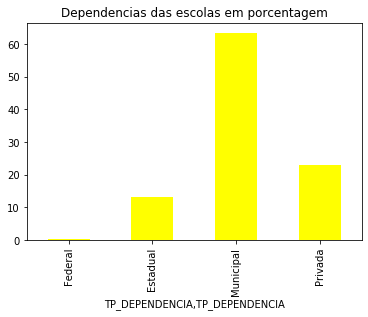

In [8]:
fig, ax = plt.subplots()
((gk['TP_DEPENDENCIA'].value_counts()/gk['TP_DEPENDENCIA'].count().sum())*100).plot.bar(color="yellow",title="Dependencias das escolas em porcentagem")
ax.set_xticklabels(['Federal','Estadual', 'Municipal','Privada'])

[Text(0, 0, 'Federal'),
 Text(0, 0, 'Estadual'),
 Text(0, 0, 'Municipal'),
 Text(0, 0, 'Privada')]

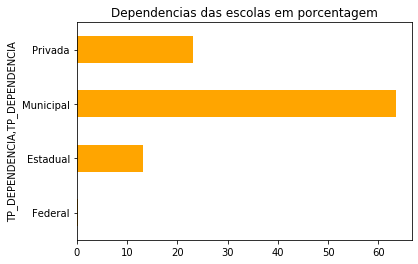

In [9]:
fig, ay = plt.subplots()
((gk['TP_DEPENDENCIA'].value_counts()/gk['TP_DEPENDENCIA'].count().sum())*100).plot.barh(color="orange",title="Dependencias das escolas em porcentagem")
ay.set_yticklabels(['Federal','Estadual', 'Municipal','Privada'])

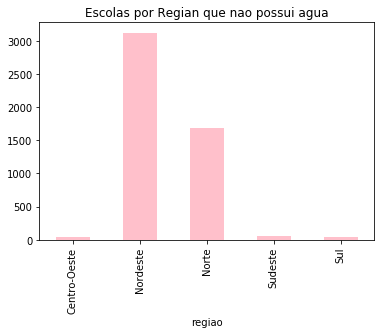

In [10]:
df5.groupby('regiao')['TOTAL_CONTAGEM'].sum().plot.bar(x='regiao' , color="pink", y='TOTAL_CONTAGEM',title="Escolas por Regian que nao possui agua")

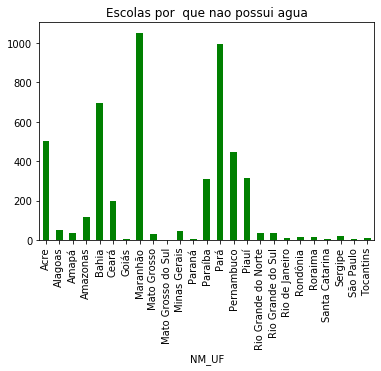

In [11]:
df5.groupby('NM_UF')['TOTAL_CONTAGEM'].sum().plot.bar(x='regiao' , color="green", y='TOTAL_CONTAGEM',title="Escolas por  que nao possui agua")

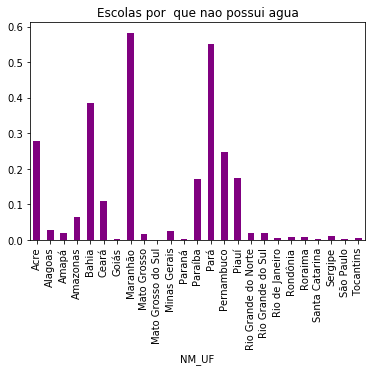

In [12]:
df5.groupby('NM_UF')['PERCENT'].sum().plot.bar(x='regiao' , color="purple", y='TOTAL_CONTAGEM', title="Escolas por  que nao possui agua")

In [27]:
df6 = df_TS_ESC.groupby('ID_DEPENDENCIA_ADM')

df6.head()

,ID_PROVA_BRASIL,ID_UF,ID_MUNICIPIO,ID_ESCOLA,ID_DEPENDENCIA_ADM,ID_LOCALIZACAO,PC_FORMACAO_DOCENTE_INICIAL,PC_FORMACAO_DOCENTE_FINAL,PC_FORMACAO_DOCENTE_MEDIO,NIVEL_SOCIO_ECONOMICO,...,TX_RESP_Q065,TX_RESP_Q066,TX_RESP_Q067,TX_RESP_Q068,TX_RESP_Q069,TX_RESP_Q070,TX_RESP_Q071,TX_RESP_Q072,TX_RESP_Q073,TX_RESP_Q074
0,2017,11,1100015,11024666,3,2,83.3,55.6,NaN,Grupo 2,...,A,C,B,A,A,A,A,A,B,A
1,2017,11,1100015,11024682,2,1,94.2,64.1,NaN,Grupo 3,...,A,C,B,A,A,A,A,A,A,A
2,2017,11,1100015,11024828,3,1,100.0,55.6,NaN,Grupo 3,...,A,B,B,A,B,B,A,A,A,B
3,2017,11,1100015,11024968,2,1,NaN,48.9,77.1,Grupo 3,...,B,C,C,A,B,B,A,A,A,B
4,2017,11,1100015,11025077,3,1,100.0,55.6,NaN,NaN,...,B,B,B,A,A,B,A,A,A,C
5,2017,11,1100015,11025310,3,1,78.6,63.9,NaN,NaN,...,A,B,A,A,A,B,A,A,A,A
6,2017,11,1100015,11025352,3,2,100.0,55.6,NaN,NaN,...,A,NaN,B,A,A,B,B,A,A,A
7,2017,11,1100015,11025620,2,1,85.0,45.0,NaN,Grupo 3,...,A,B,B,A,B,A,A,A,A,C
8,2017,11,1100015,11025638,2,1,NaN,51.9,53.7,Grupo 3,...,A,C,B,A,B,A,A,A,A,C
11,2017,11,1100023,11006773,2,1,100.0,61.7,54.3,Grupo 3,...,A,B,A,A,A,A,A,A,A,A


In [15]:
[x for x in df_TS_ESC.columns]

['ID_PROVA_BRASIL',
 'ID_UF',
 'ID_MUNICIPIO',
 'ID_ESCOLA',
 'ID_DEPENDENCIA_ADM',
 'ID_LOCALIZACAO',
 'PC_FORMACAO_DOCENTE_INICIAL',
 'PC_FORMACAO_DOCENTE_FINAL',
 'PC_FORMACAO_DOCENTE_MEDIO',
 'NIVEL_SOCIO_ECONOMICO',
 'NU_MATRICULADOS_CENSO_5EF',
 'NU_PRESENTES_5EF',
 'TAXA_PARTICIPACAO_5EF',
 'NIVEL_0_LP5',
 'NIVEL_1_LP5',
 'NIVEL_2_LP5',
 'NIVEL_3_LP5',
 'NIVEL_4_LP5',
 'NIVEL_5_LP5',
 'NIVEL_6_LP5',
 'NIVEL_7_LP5',
 'NIVEL_8_LP5',
 'NIVEL_9_LP5',
 'NIVEL_0_MT5',
 'NIVEL_1_MT5',
 'NIVEL_2_MT5',
 'NIVEL_3_MT5',
 'NIVEL_4_MT5',
 'NIVEL_5_MT5',
 'NIVEL_6_MT5',
 'NIVEL_7_MT5',
 'NIVEL_8_MT5',
 'NIVEL_9_MT5',
 'NIVEL_10_MT5',
 'NU_MATRICULADOS_CENSO_9EF',
 'NU_PRESENTES_9EF',
 'TAXA_PARTICIPACAO_9EF',
 'NIVEL_0_LP9',
 'NIVEL_1_LP9',
 'NIVEL_2_LP9',
 'NIVEL_3_LP9',
 'NIVEL_4_LP9',
 'NIVEL_5_LP9',
 'NIVEL_6_LP9',
 'NIVEL_7_LP9',
 'NIVEL_8_LP9',
 'NIVEL_0_MT9',
 'NIVEL_1_MT9',
 'NIVEL_2_MT9',
 'NIVEL_3_MT9',
 'NIVEL_4_MT9',
 'NIVEL_5_MT9',
 'NIVEL_6_MT9',
 'NIVEL_7_MT9',
 'NIVEL_8_MT9',
